In [14]:
# Libs
import ipeadatapy as idpy
import pandas as pd

# Dataviz libs
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
idpy.list_series(code="EIA366_PBRENT366")

,CODE,NAME
5890,EIA366_PBRENT366,Preço - petróleo bruto - Brent (FOB)


In [3]:
idpy.describe("EIA366_PBRENT366")

,Preço - petróleo bruto - Brent (FOB)
Name,Preço - petróleo bruto - Brent (FOB)
Code,EIA366_PBRENT366
Big Theme,Macroeconômico
Theme code,11
Source,Energy Information Administration (EIA)
Source acronym,EIA
Comment,Preço por barril do petróleo bruto tipo Brent....
Last update,2024-01-10T15:48:01.25-03:00
Frequency,Diária
Measure,US$


In [4]:
idpy.metadata("EIA366_PBRENT366")

,CODE,NAME,COMMENT,LAST UPDATE,BIG THEME,SOURCE ACRONYM,SOURCE,SOURCE URL,FREQUENCY,MEASURE,UNIT,SERIES STATUS,THEME CODE,COUNTRY,NUMERICA
0,EIA366_PBRENT366,Preço - petróleo bruto - Brent (FOB),Preço por barril do petróleo bruto tipo Brent....,2024-01-10T15:48:01.25-03:00,Macroeconômico,EIA,Energy Information Administration (EIA),www.eia.doe.gov,Diária,US$,None,A,11,BRA,True


In [5]:
df_ipea_brent_oil = idpy.timeseries("EIA366_PBRENT366").reset_index()
df_ipea_brent_oil.head()

,DATE,CODE,RAW DATE,DAY,MONTH,YEAR,VALUE (US$)
0,1986-01-04,EIA366_PBRENT366,1986-01-04T00:00:00-02:00,4,1,1986,NaN
1,1986-01-05,EIA366_PBRENT366,1986-01-05T00:00:00-02:00,5,1,1986,NaN
2,1986-01-06,EIA366_PBRENT366,1986-01-06T00:00:00-02:00,6,1,1986,NaN
3,1986-01-07,EIA366_PBRENT366,1986-01-07T00:00:00-02:00,7,1,1986,NaN
4,1986-01-08,EIA366_PBRENT366,1986-01-08T00:00:00-02:00,8,1,1986,NaN


In [6]:
df_ipea_brent_oil = df_ipea_brent_oil[["DATE", "VALUE (US$)"]].copy()
df_ipea_brent_oil = df_ipea_brent_oil.rename(columns={"DATE": 'date', "VALUE (US$)": "value"})
df_ipea_brent_oil = df_ipea_brent_oil.dropna(subset="value")

In [11]:
df_ipea_brent_oil['date'] = pd.to_datetime(df_ipea_brent_oil['date'], format='%Y-%m-%d')
df_ipea_brent_oil.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11082 entries, 0 to 11081
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    11082 non-null  datetime64[ns]
 1   value   11082 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 173.3 KB


<Axes: title={'center': 'Histograma variável target "Último"'}, xlabel='value', ylabel='Count'>

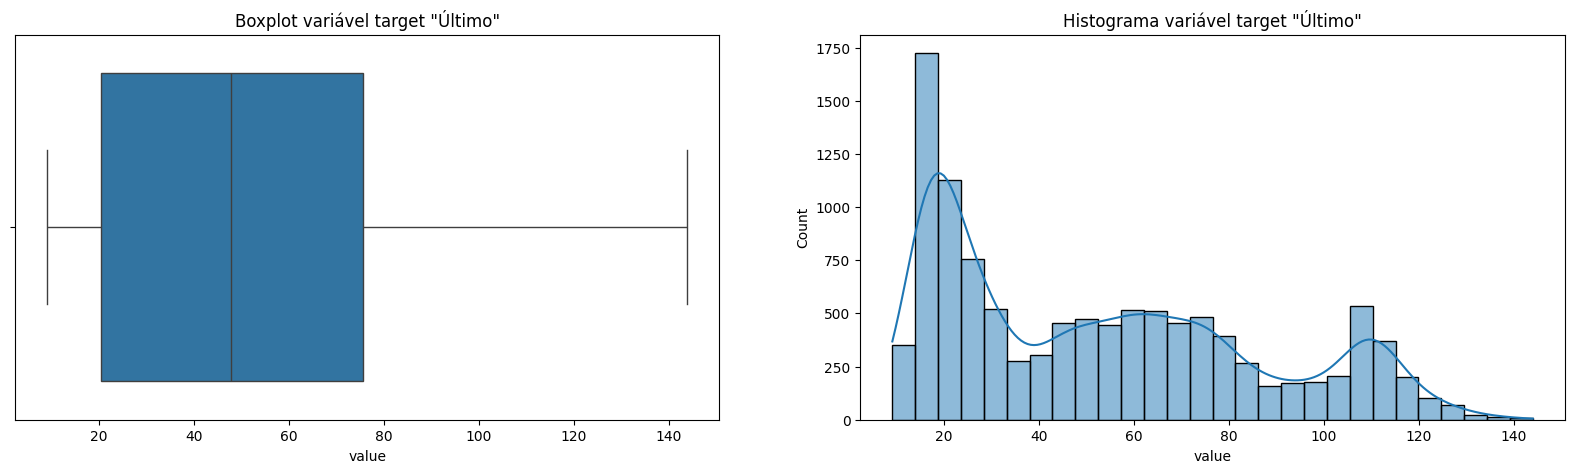

In [15]:
# Verificando outliers na variável target
# sns.set(style="whitegrid")
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(20, 5)

ax[0].title.set_text('Boxplot variável target "Último"')
sns.boxplot(
    x=df_ipea_brent_oil['value'], 
    ax=ax[0]
    )

ax[1].title.set_text('Histograma variável target "Último"')
sns.histplot(
    x=df_ipea_brent_oil['value'], 
    kde=True,
    ax=ax[1]
    )
